# **Needs Analysis for JUMP Camp**

JUMP Camp is a project proposed by the University of San Carlos - Computer Engineering Council that seeks to educate and develop the technical skills of the youth especially in basic and fundamental computer skills such as General Computer Knowledge, Word Processing, Spreadsheets, Email, Computer Conferencing, Mail Groups, and WWW. This Exploratory Data Analysis project is in compliance with the requirement to provide data to back up the needs assessment of the project in order for it to push through.

The project seeks to answer the following questions:
1. What is the average cumulative score of the respondents per category?
2. What is the distribution of scores for each category and the overall test?
3. Which categories do the respondents struggle with?
4. Which ages need the most help?

# **Setup**
Next cell imports all Python libraries needed for the project.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

# **Import dataset**

The dataset contains the name of the respondent, age, and a binary representation of the "Yes" or "No" answers they provided to the survey given.

In [12]:
res_data = pd.read_csv("../data/test_results.csv")
res_data

,Age,q_1,q_2,q_3,q_4,q_5,q_6,q_7,q_8,q_9,...,q_31,q_32,q_33,q_34,q_35,q_36,q_37,q_38,q_39,q_40
0,18,0,0,0,1,1,1,0,1,0,...,1,1,1,1,1,1,0,0,1,0
1,18,0,1,1,1,1,1,0,0,0,...,1,1,1,1,1,1,0,0,1,0
2,16,1,0,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
3,17,1,0,1,1,0,1,0,0,0,...,1,1,1,0,1,1,1,0,0,0
4,17,0,0,0,1,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
5,20,0,1,1,1,1,1,1,1,1,...,1,1,0,0,1,0,0,0,1,0
6,15,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
7,17,0,0,0,1,0,1,0,0,0,...,1,1,0,0,1,1,0,1,1,0
8,13,0,0,1,0,0,0,1,1,0,...,1,0,0,0,1,0,0,0,0,1
9,14,0,0,0,1,1,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0


# **Plots and Analysis**

### 1. What is the average cumulative score of the respondents per category?

In [13]:
# Set up dictionary for mean values

means = dict()

In [14]:
# Calculating average cumulative score for General Computer Knowledge

means['General Computer Knowledge'] = res_data.loc[:,"q_1":"q_10"].sum().sum() / len(res_data.index)
means['Word Processing'] = res_data.loc[:,"q_11":"q_20"].sum().sum() / len(res_data.index)
means['Spreadsheets'] = res_data.loc[:,"q_21":"q_30"].sum().sum() / len(res_data.index)
means['Communications and Surfing'] = res_data.loc[:,"q_31":"q_40"].sum().sum() / len(res_data.index)
print("Average Cumulative Scores:")
for key in means.keys():
    print(f"{key}: {means[key]}")

Average Cumulative Scores:
General Computer Knowledge: 4.55
Word Processing: 4.95
Spreadsheets: 1.1
Communications and Surfing: 5.3


Text(0.5, 0, 'Category Name')

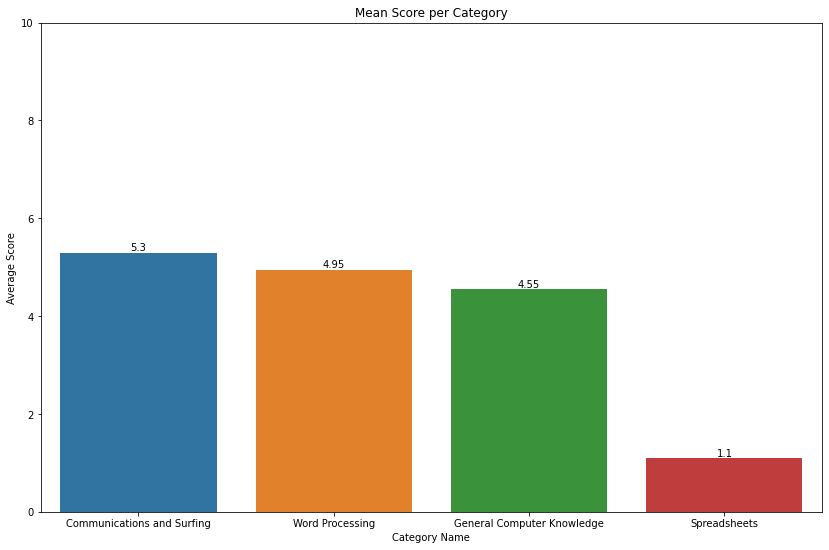

In [15]:
# Plot a bar plot for mean score per category

mean_data = pd.Series(means).sort_values(ascending=False)
plt.figure(figsize=(14,9))
plt.title("Mean Score per Category")
g = sns.barplot(x=mean_data.index, y=mean_data.values)
g.bar_label(g.containers[0])
g.set_ylim(0, 10)
g.set_ylabel("Average Score")
g.set_xlabel("Category Name")

The averages represented here are the amount of `Yes` answers in the questions of the specific category. Across the 4 categories, the respondents seem to score best with Communications and Surfing at an average of 5.3. They scored the worst with Spreadsheets at an average of 1.1. A point of concern is that only Communications and Surfing has achieved a mean past the half of the amount of questions which is 10 each. 

### 2. What is the distribution of scores for each category and the overall test?

In [16]:
# Get sum of scores per category per student

res_data["Total_General_Comp_Knowledge"] = res_data.loc[:,"q_1":"q_10"].sum(axis=1)
res_data["Total_Word_Proc"] = res_data.loc[:,"q_11":"q_20"].sum(axis=1)
res_data["Total_Spreadsheets"] = res_data.loc[:,"q_21":"q_30"].sum(axis=1)
res_data["Total_Comms_Surfing"] = res_data.loc[:,"q_31":"q_40"].sum(axis=1)
res_data["Total_Score"] = res_data.loc[:,"q_1":"q_40"].sum(axis=1)
res_data

,Age,q_1,q_2,q_3,q_4,q_5,q_6,q_7,q_8,q_9,...,q_36,q_37,q_38,q_39,q_40,Total_General_Comp_Knowledge,Total_Word_Proc,Total_Spreadsheets,Total_Comms_Surfing,Total_Score
0,18,0,0,0,1,1,1,0,1,0,...,1,0,0,1,0,5,8,2,7,22
1,18,0,1,1,1,1,1,0,0,0,...,1,0,0,1,0,5,7,0,7,19
2,16,1,0,1,1,1,1,1,0,1,...,1,1,1,1,1,8,9,2,10,29
3,17,1,0,1,1,0,1,0,0,0,...,1,1,0,0,0,4,4,0,6,14
4,17,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3,4
5,20,0,1,1,1,1,1,1,1,1,...,0,0,0,1,0,8,6,0,4,18
6,15,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,2,1,0,3,6
7,17,0,0,0,1,0,1,0,0,0,...,1,0,1,1,0,2,4,0,6,12
8,13,0,0,1,0,0,0,1,1,0,...,0,0,0,0,1,4,5,0,3,12
9,14,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,3,2,0,2,7


Text(0, 0.5, 'Count')

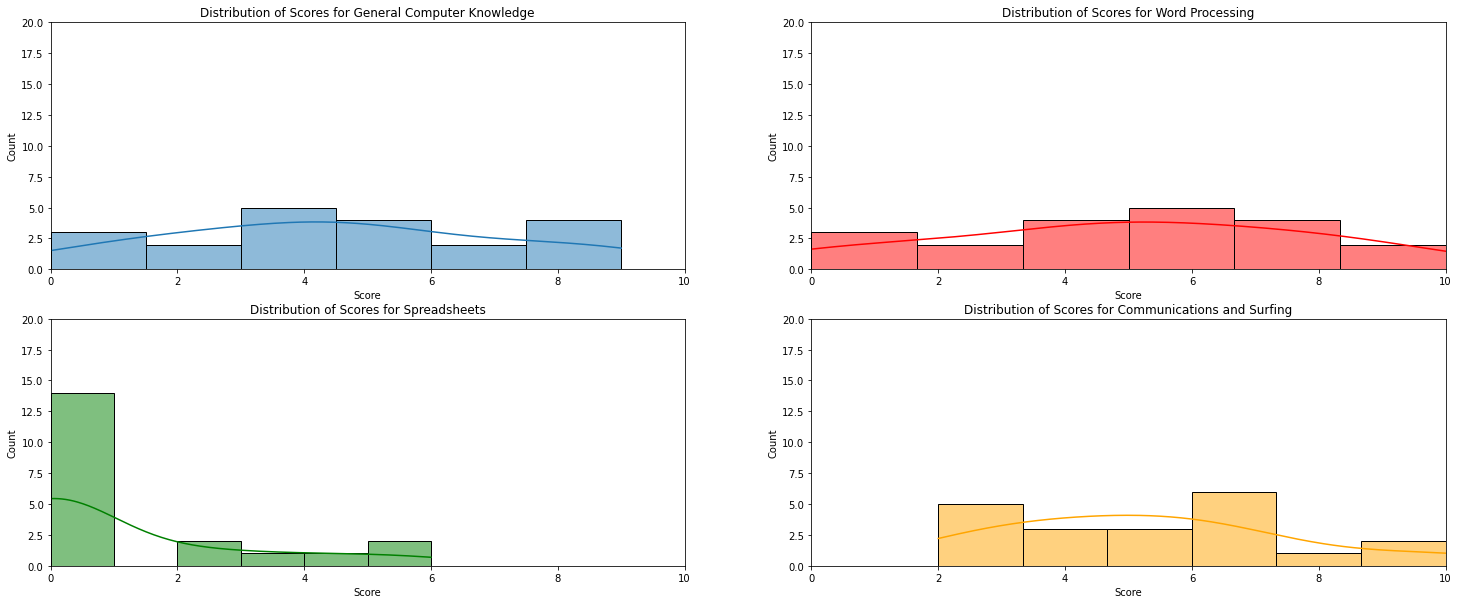

In [17]:
# Plot distribution plots for each category

fig, ax = plt.subplots(2, 2, figsize=(25,10))

plt.subplot(2, 2, 1)
plt.title("Distribution of Scores for General Computer Knowledge")
g = sns.histplot(data=res_data['Total_General_Comp_Knowledge'], kde=True)
g.set_xlim(0, 10)
g.set_ylim(0, len(res_data.index))
g.set_xlabel("Score")
g.set_ylabel("Count")

plt.subplot(2, 2, 2)
plt.title("Distribution of Scores for Word Processing")
g = sns.histplot(data=res_data['Total_Word_Proc'], kde=True, color="red")
g.set_xlim(0, 10)
g.set_ylim(0, len(res_data.index))
g.set_xlabel("Score")
g.set_ylabel("Count")

plt.subplot(2, 2, 3)
plt.title("Distribution of Scores for Spreadsheets")
g = sns.histplot(data=res_data['Total_Spreadsheets'], kde=True, color="green")
g.set_xlim(0, 10)
g.set_ylim(0, len(res_data.index))
g.set_xlabel("Score")
g.set_ylabel("Count")

plt.subplot(2, 2, 4)
plt.title("Distribution of Scores for Communications and Surfing")
g = sns.histplot(data=res_data['Total_Comms_Surfing'], kde=True, color="orange")
g.set_xlim(0, 10)
g.set_ylim(0, len(res_data.index))
g.set_xlabel("Score")
g.set_ylabel("Count")

In [18]:
skewness = res_data.loc[:, "Total_General_Comp_Knowledge":"Total_Comms_Surfing"].skew()
print("Skewness for each category:")
skewness 

Skewness for each category:


Total_General_Comp_Knowledge    0.156251
Total_Word_Proc                -0.154965
Total_Spreadsheets              1.586629
Total_Comms_Surfing             0.578835
dtype: float64

In [19]:
kurtosis = res_data.loc[:, "Total_General_Comp_Knowledge":"Total_Comms_Surfing"].kurtosis()
print("Kurtosis for each category:")
kurtosis 

Kurtosis for each category:


Total_General_Comp_Knowledge   -0.826637
Total_Word_Proc                -0.789970
Total_Spreadsheets              1.349883
Total_Comms_Surfing            -0.102468
dtype: float64

According to SPCForExcel, General Computer Knowledge and Word Processing are fairly symmetrical. This means the scores are close to being normally distributed. However for Communications and Surfing, it is moderately skewed to the right which indicates that the majority of scores favor the higher ranges of scores. For Spreadsheets, it is highly skewed to the right which indicates that the majority of scores favor the relatively higher ranges of scores below the passing score.

For kurtosis, all scores are more or less normal or known as `mesokurtic`. 

The conclusion we can draw from this is that the tails are well-behaved, that means it decays not too fast or too slow. However, the distribution of other categories favor one side of the distribution. A factor of this could also be sample size but as a result of the data gathered, take this conclusion as a grain of salt.

### 3. Which categories do the respondents struggle with?

To answer this question, we need to take a look back at the graphs created from the previous question. The category that respondents struggle with the most are Spreadsheets, followed by General Computer Knowledge, then by Word Processing, and lastly with Communications and Surfing.

### 4. Which ages need the most help?

Text(0, 0.5, 'Average Score')

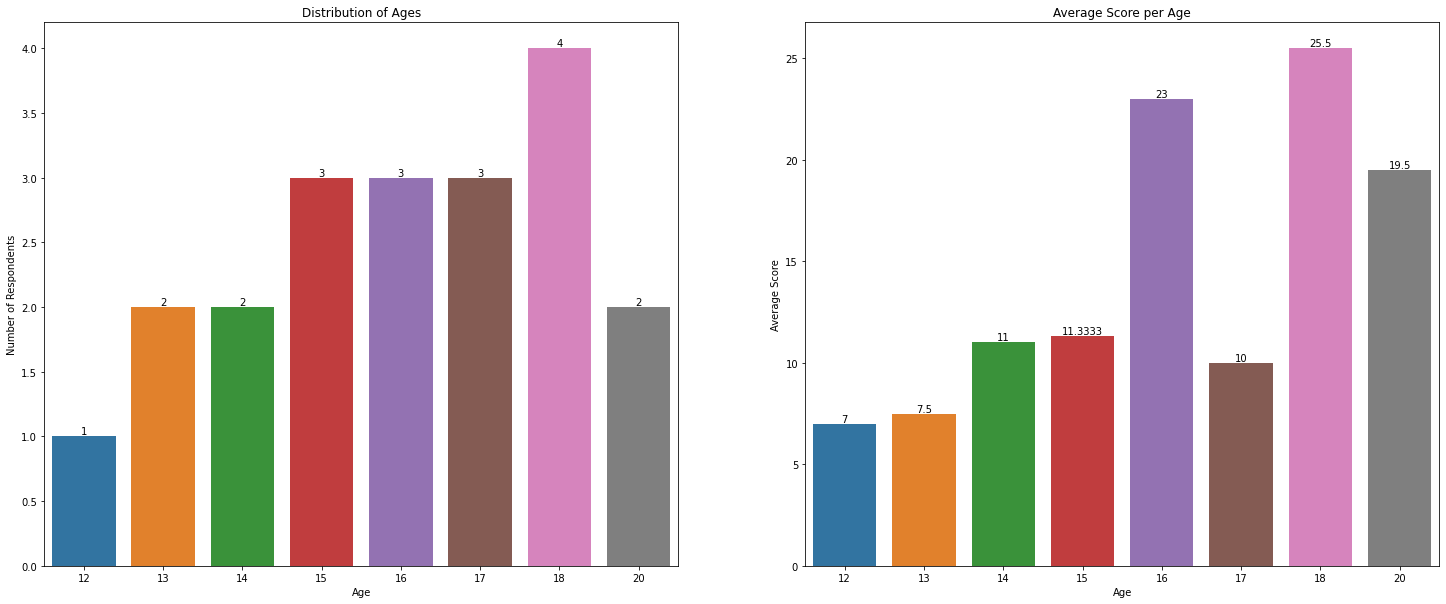

In [20]:
# Plot distribution of ages and average score per age

fig, ax = plt.subplots(1, 2, figsize=(25,10))

plt.subplot(1, 2, 1)
plt.title("Distribution of Ages")
g = sns.countplot(x=res_data["Age"])
g.bar_label(g.containers[0])
g.set_ylabel("Number of Respondents")

plt.subplot(1, 2, 2)
plt.title("Average Score per Age")
age_group = res_data.groupby("Age", as_index=False).mean()
g = sns.barplot(data=age_group, x="Age", y="Total_Score")
g.bar_label(g.containers[0])
g.set_ylabel("Average Score")

Based on the average score per age, only 16 and 18 year olds averaged a score higher than 50%. All ages within the range 12 - 20 except 16 and 18, score below 50% with 12 and 13 year olds averaging the least. However, these averages may not be accurate once again because of the inequality in terms of sample size per age. 

# **Conclusion**

Therefore, JUMP Camp is needed and viable as long as the following conditions are met:
1. Heavier focus on spreadsheets and general computer knowledge.
2. Participants should be comprised more of early-teen students.

# **Recommendations**

1. Greater sample size preferably 100 - 200 to ensure better intrepretaion of skewness and kurtosis.